<a href="https://colab.research.google.com/github/jas-tang/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt


# Simple Linear Regression

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

In [ ]:
# data (as pandas dataframes)
df = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...
2273,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,2.0,2.0,27.4,90.0,2.0,108.0,4.99


LBXIN	Feature	Continuous		Respondent's Blood Insulin Levels -> Dependent Variable

LBXGLU	Feature	Continuous		Respondent's Blood Glucose after fasting -> Independent Variable

In [ ]:
df.describe()

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [ ]:
X = sm.add_constant(df['LBXIN'])  # Adds a constant term to the predictor
model = sm.OLS(df['LBXGLU'], X)
print(X)

      const  LBXIN
0       1.0  14.91
1       1.0   3.85
2       1.0   6.14
3       1.0  16.15
4       1.0  10.92
...     ...    ...
2273    1.0   6.53
2274    1.0  13.02
2275    1.0  21.41
2276    1.0   4.99
2277    1.0   3.76

[2278 rows x 2 columns]


In [ ]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 LBXGLU   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.53e-24
Time:                        02:14:15   Log-Likelihood:                -9749.8
No. Observations:                2278   AIC:                         1.950e+04
Df Residuals:                    2276   BIC:                         1.952e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.9367      0.577    164.420      0.0

The R-squared value of 0.045, meaning an approximate 4%, tells us that our dependent variable probably does not have a strong strong correlation for predicting the independent variable. The Respondent's Blood Insulin Levels does not really predict the Respondent's Blood Glucose after fasting. 4% of the variance that we see in Blood glucose level after fasting can be attributed to the blood insulin levels.

In [ ]:
residuals = results.resid
fitted = results.fittedvalues

In [ ]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.5561299095673122, p-value=0.9999999999999999


Interestingly, the p-value seems to be greater than .05, meaning that there is a linear relationship.

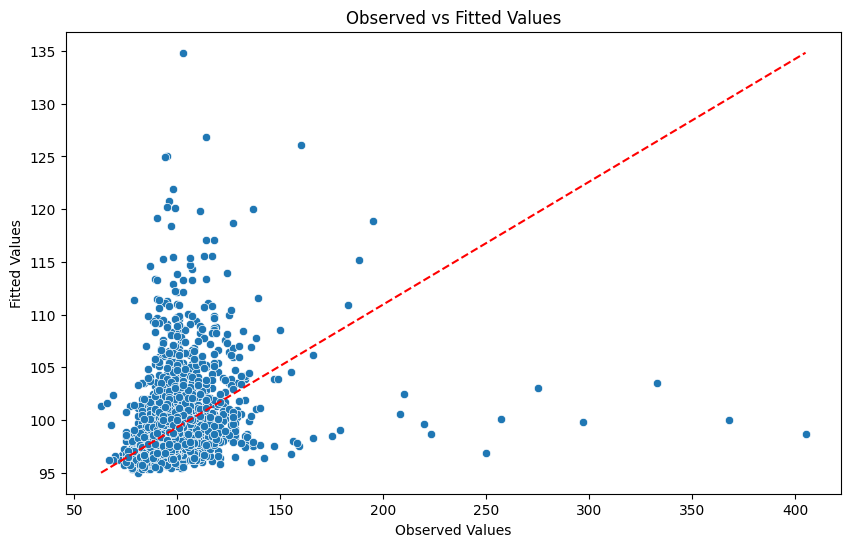

In [ ]:
## A non significant p-value indicates that the relationship is linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['LBXGLU'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['LBXGLU']), max(df['LBXGLU'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

This does not look like the correct test to run for these values.

In [ ]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.5776776075363159, p-value=0.0


There is not a normal distribution of residuals.

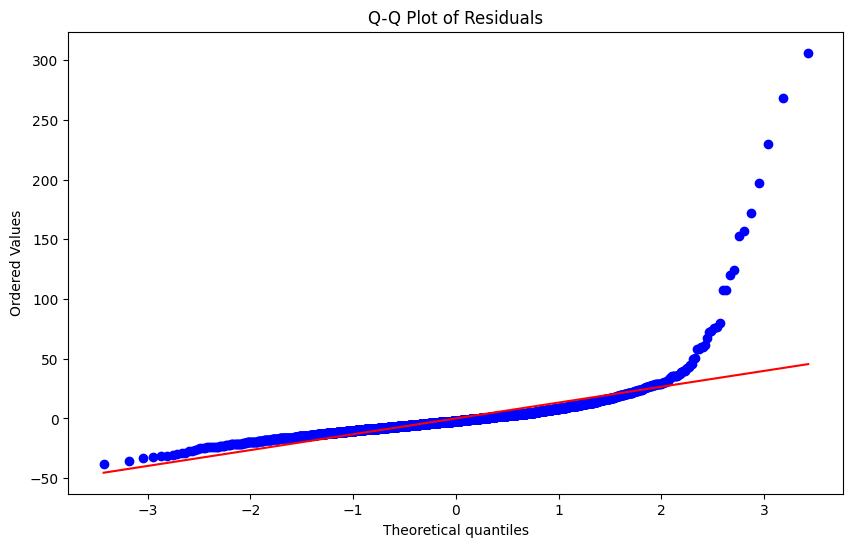

In [ ]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [ ]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.1971619635468016, p-value=0.001217680059819782


This P-value is lower than .05, meaning that the homogeneity of variance has not been met.

To summarize, our R-squared tells us that that The Respondent's Blood Insulin Levels does not really predict the Respondent's Blood Glucose after fasting. The relationship is said to be linear. The normality is not normally distributed. The homogeneity hass also not been met.

# Multiple Linear Regression

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
yeast = fetch_ucirepo(id=110)

# data (as pandas dataframes)
df2 = yeast.data.features
df2

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


alm: Score of the ALOM membrane spanning region prediction program.

mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.

erl: Presence of HDEL substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.

pox: Peroxisomal targeting signal in the C-terminus.

vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.

nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.


In [ ]:
listofpredictors = df2[['mit', 'erl', 'pox', 'vac', 'nuc']]
listofpredictors

,mit,erl,pox,vac,nuc
0,0.13,0.5,0.0,0.48,0.22
1,0.27,0.5,0.0,0.53,0.22
2,0.15,0.5,0.0,0.53,0.22
3,0.13,0.5,0.0,0.54,0.22
4,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...
1479,0.17,0.5,0.0,0.53,0.22
1480,0.40,0.5,0.0,0.48,0.47
1481,0.19,0.5,0.0,0.56,0.22
1482,0.16,0.5,0.0,0.53,0.39


In [ ]:
# Fit the regression model
X = sm.add_constant(listofpredictors)  # Adds a constant term to the predictor
y = df2['alm']
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    alm   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     11.16
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.43e-10
Time:                        03:44:48   Log-Likelihood:                 1551.6
No. Observations:                1484   AIC:                            -3091.
Df Residuals:                    1478   BIC:                            -3059.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6298      0.030     20.693      0.0

Our adjusted R-squared is .03, or 3%. This means that our independent variables has little predictability for our dependent variable.

Based off the p- values, mit, erl, pox, and nuc are all not significant while vac is. We can theoretically drop the not significant values for a backwards regression.

In [ ]:
listofpredictors2 = df2[['vac']]
listofpredictors2

,vac
0,0.48
1,0.53
2,0.53
3,0.54
4,0.48
...,...
1479,0.53
1480,0.48
1481,0.56
1482,0.53


In [ ]:
# Fit the regression model
X = sm.add_constant(listofpredictors2)  # Adds a constant term to the predictor
y = df2['alm']
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    alm   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     52.99
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           5.41e-13
Time:                        03:42:24   Log-Likelihood:                 1550.2
No. Observations:                1484   AIC:                            -3096.
Df Residuals:                    1482   BIC:                            -3086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6393      0.019     33.193      0.0

We see a very slight increase in R-Squared.

Going back to using multiple independent variables because we had to remove 4 of them after the backwards regression.

In [61]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.1546391594034604, p-value=0.025433623259621063


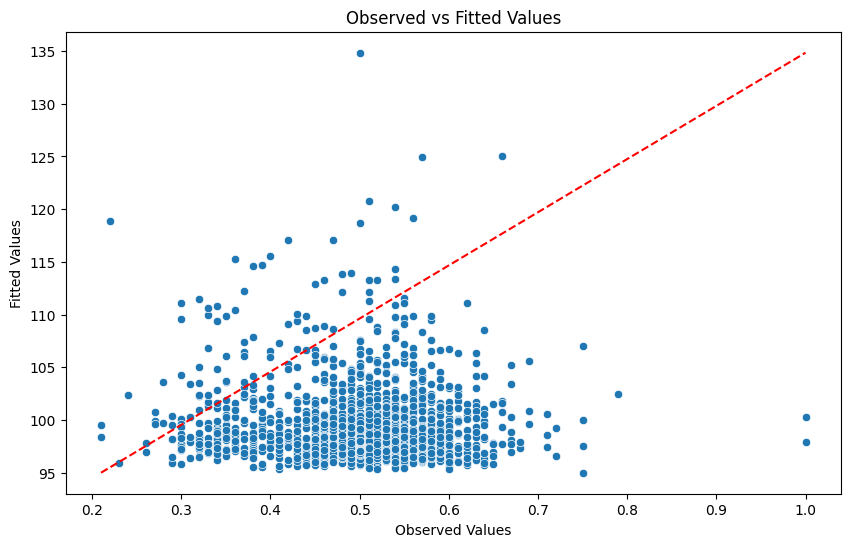

In [ ]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2['alm'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df2['alm']), max(df2['alm'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

In [64]:
residuals = results.resid
fitted = results.fittedvalues

In [65]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.973564624786377, p-value=7.147997221826753e-16


There is a normal distribution of residuals because p-value is less than .05.

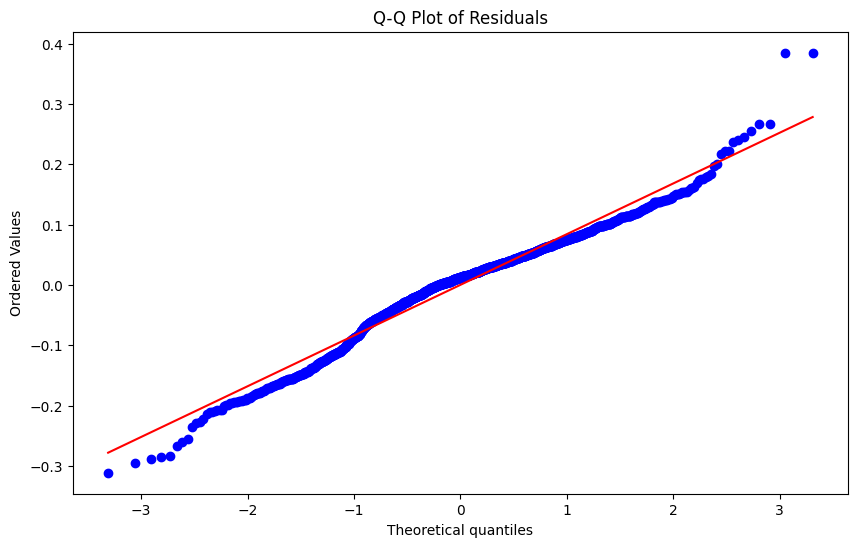

In [66]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [67]:
##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.1340584877887678, p-value=0.044066389293097995


This P-value is lower than .05, meaning that the homogeneity of variance has not been met.

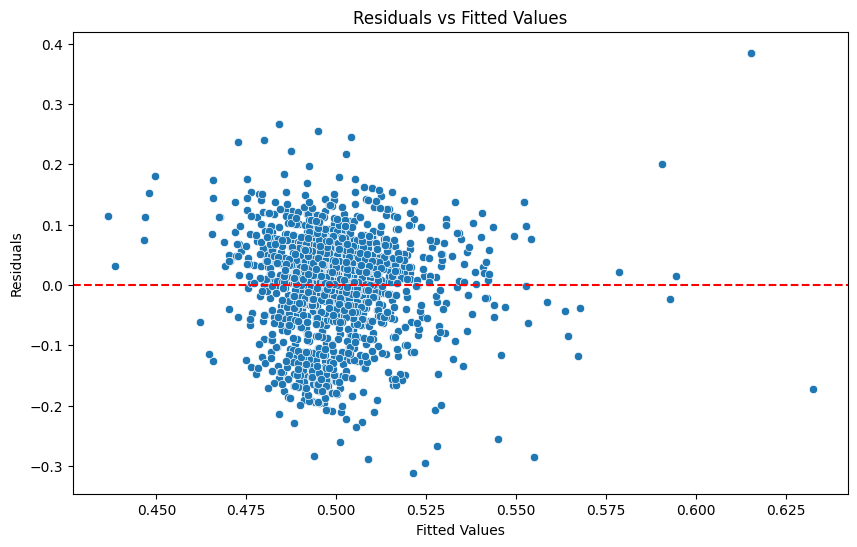

In [68]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
  Variable         VIF
0    const  189.255945
1      mit    1.013064
2      erl    1.002024
3      pox    1.002049
4      vac    1.020608
5      nuc    1.011709


There are no independent variables that are highly correlated with any of the other independent variables that exist in our model as all of the VIF values are less than 10.